In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from scipy.stats import randint
from sklearn import metrics


In [2]:
Airlines = pd.read_excel('G:\\Machine Learning\\FINAL BOOTCAMP PROJECT\\capstone\\Capstone_3\\Airlines.xlsx')


In [3]:
Runways = pd.read_excel('G:\\Machine Learning\\FINAL BOOTCAMP PROJECT\\capstone\\Capstone_3\\runways.xlsx')

In [4]:
Airlines.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [5]:
Runways.head(5)

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,le_ident,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
0,269408,6523,00A,80.0,80.0,ASPH-G,1,0,H1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,255155,6524,00AK,2500.0,70.0,GRVL,0,0,N,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
2,254165,6525,00AL,2300.0,200.0,TURF,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
3,270932,6526,00AR,40.0,40.0,GRASS,0,0,H1,NaN,NaN,NaN,NaN,NaN,H1,NaN,NaN,NaN,NaN,NaN
4,322128,322127,00AS,1450.0,60.0,Turf,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN


In [6]:
Runway1=Runways.drop(['length_ft','width_ft','le_ident','airport_ident','airport_ref','surface','le_latitude_deg','le_longitude_deg','le_elevation_ft','le_heading_degT','le_displaced_threshold_ft','he_ident','he_latitude_deg','he_longitude_deg','he_elevation_ft','he_heading_degT','he_displaced_threshold_ft'],axis=1)

In [7]:
Runway1.isnull().sum()

id         0
lighted    0
closed     0
dtype: int64

In [8]:
Airlines.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [9]:
df = pd.merge(Airlines,Runway1,on ="id",how = "outer")

In [10]:
# Delete id column
df = df.drop(columns = ['id'],axis =1)

### Data Analysis

In [11]:
# Bring only the nuemric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_column_names = df.select_dtypes(include=numerics).columns
print(numeric_column_names, '\n')

# Bring only the object columns (strings)
objects = 'object'
object_column_names = df.select_dtypes(include=objects).columns
print(object_column_names, '\n')

Index(['Flight', 'DayOfWeek', 'Time', 'Length', 'Delay', 'lighted', 'closed'], dtype='object') 

Index(['Airline', 'AirportFrom', 'AirportTo'], dtype='object') 



In [12]:
df.isnull().sum()

Airline          1587
Flight           1587
AirportFrom      1587
AirportTo        1587
DayOfWeek        1587
Time             1587
Length           1587
Delay            1587
lighted        476166
closed         476166
dtype: int64

In [13]:
df = df.dropna().reset_index(drop = True)

In [14]:
df.isnull().sum()

Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
lighted        0
closed         0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42390 entries, 0 to 42389
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Airline      42390 non-null  object 
 1   Flight       42390 non-null  float64
 2   AirportFrom  42390 non-null  object 
 3   AirportTo    42390 non-null  object 
 4   DayOfWeek    42390 non-null  float64
 5   Time         42390 non-null  float64
 6   Length       42390 non-null  float64
 7   Delay        42390 non-null  float64
 8   lighted      42390 non-null  float64
 9   closed       42390 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.2+ MB


In [16]:
df.nunique()

Airline          17
Flight         6291
AirportFrom     285
AirportTo       288
DayOfWeek         6
Time           1074
Length          409
Delay             2
lighted           2
closed            2
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42390 entries, 0 to 42389
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Airline      42390 non-null  object 
 1   Flight       42390 non-null  float64
 2   AirportFrom  42390 non-null  object 
 3   AirportTo    42390 non-null  object 
 4   DayOfWeek    42390 non-null  float64
 5   Time         42390 non-null  float64
 6   Length       42390 non-null  float64
 7   Delay        42390 non-null  float64
 8   lighted      42390 non-null  float64
 9   closed       42390 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.2+ MB


In [18]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_column_names = df.select_dtypes(include=numerics).columns
print(numeric_column_names, '\n')

# Bring only the object columns (strings)
objects = 'object'
object_column_names = df.select_dtypes(include=object).columns
print(object_column_names, '\n')

Index(['Flight', 'DayOfWeek', 'Time', 'Length', 'Delay', 'lighted', 'closed'], dtype='object') 

Index(['Airline', 'AirportFrom', 'AirportTo'], dtype='object') 



In [19]:
import seaborn as sns

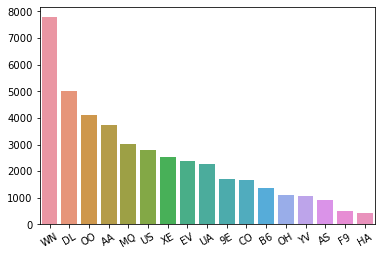

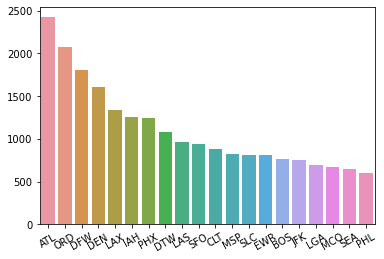

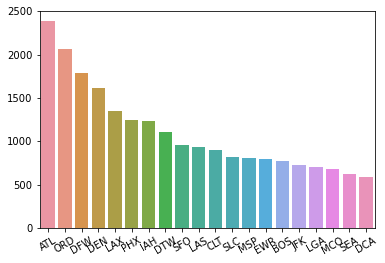

In [20]:
for column in object_column_names:
    value_counts_column =  df[column].value_counts()
    if value_counts_column.shape[0] > 20:
        value_counts_column = value_counts_column.sort_values(ascending = False)
        value_counts_column = value_counts_column[:20]
    ax = sns.barplot(y=value_counts_column.values, x=value_counts_column.index)
    ax = ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
    plt.show()

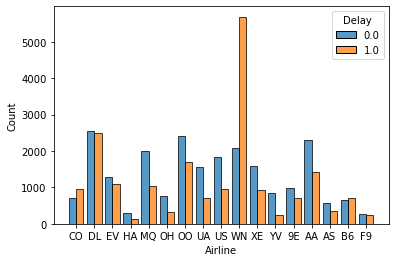

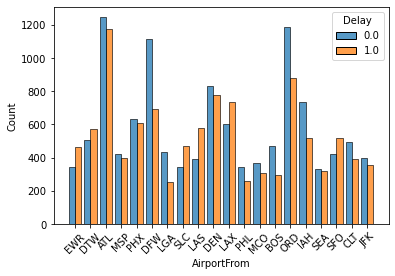

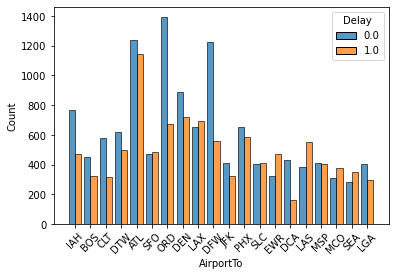

In [21]:
for column in object_column_names:
    value_counts_column =  df[column].value_counts()
    if value_counts_column.shape[0] > 20:
        value_counts_column = value_counts_column.sort_values(ascending = False)
        value_counts_column = value_counts_column[:20]
        df_aux = df[df[column].isin(value_counts_column[:20].index)]
        ax = sns.histplot(data=df_aux, x=column, hue='Delay',  multiple="dodge", shrink=.8)
        plt.xticks(rotation=45)
        plt.show()
    else:
        ax = sns.histplot(data=df, x=column, hue='Delay',  multiple="dodge", shrink=.8)
        plt.show()

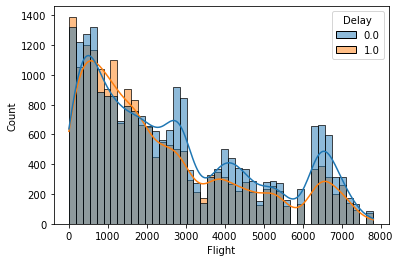

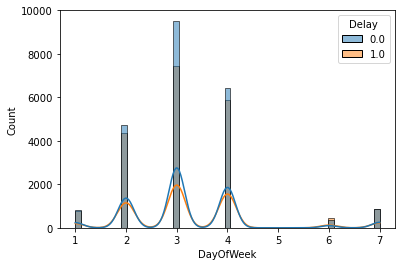

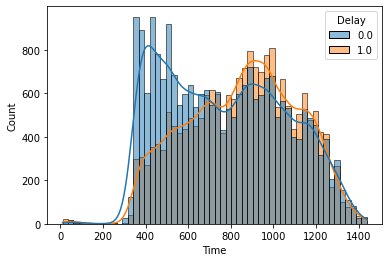

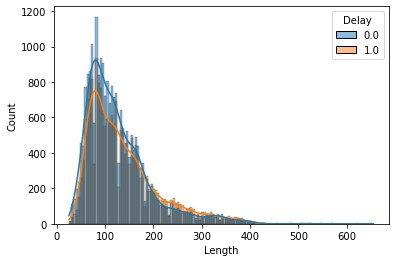

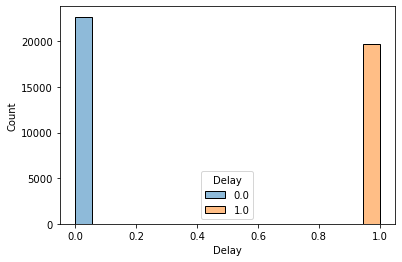

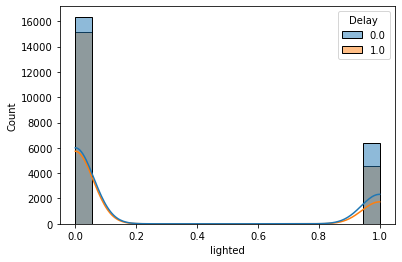

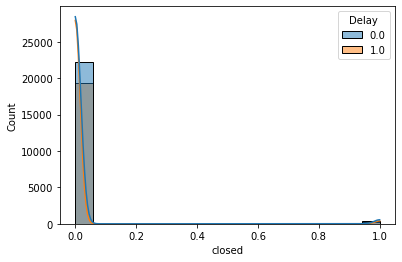

In [22]:
for column in numeric_column_names:
    ax = sns.histplot(data=df, x=column, hue='Delay', kde=True)
    plt.show()
    

In [23]:
df.corr()

,Flight,DayOfWeek,Time,Length,Delay,lighted,closed
Flight,1.000000,-0.001914,0.003736,-0.345268,-0.079681,0.000373,0.000316
DayOfWeek,-0.001914,1.000000,-0.191196,0.031047,0.017781,-0.273645,-0.046463
Time,0.003736,-0.191196,1.000000,-0.030031,0.145692,-0.022186,-0.027389
Length,-0.345268,0.031047,-0.030031,1.000000,0.077339,-0.004183,-0.002501
Delay,-0.079681,0.017781,0.145692,0.077339,1.000000,-0.053746,-0.019155
lighted,0.000373,-0.273645,-0.022186,-0.004183,-0.053746,1.000000,-0.034246
closed,0.000316,-0.046463,-0.027389,-0.002501,-0.019155,-0.034246,1.000000


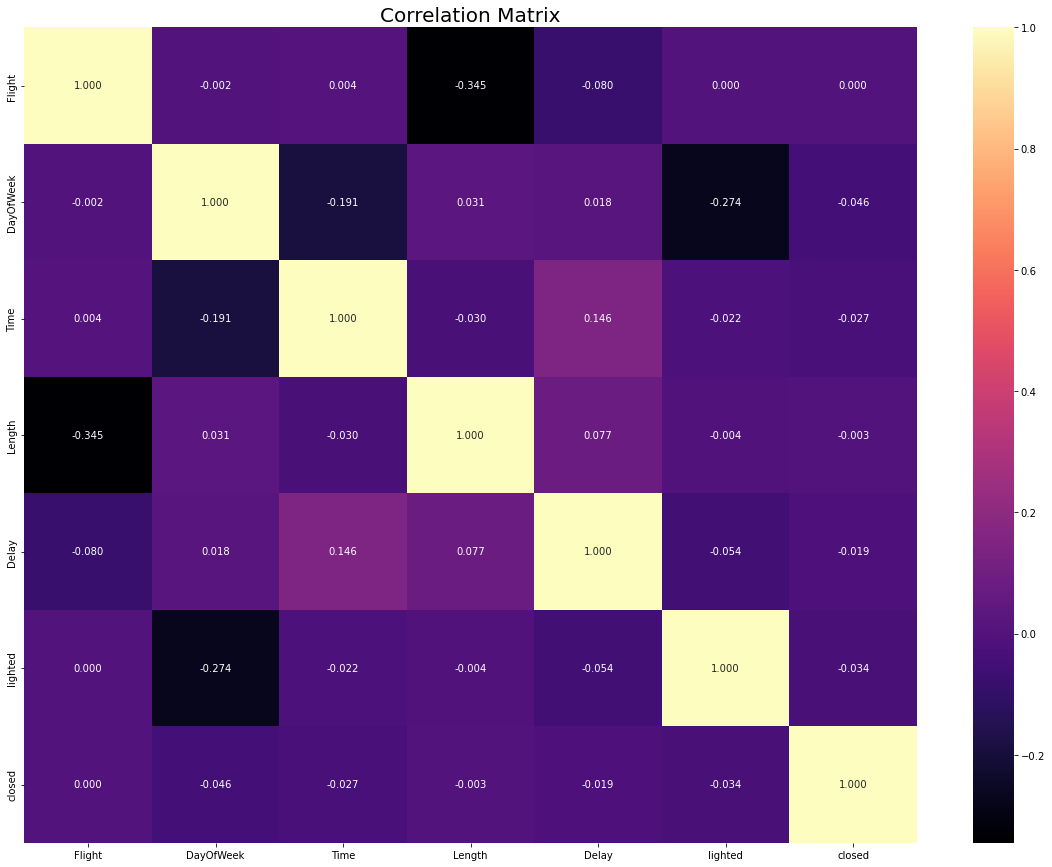

In [24]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".3f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [25]:
feature=df.drop(columns=['Delay','AirportTo', 'AirportFrom'])
target = df['Delay'] 

### Classification

Here we will try to process the categorical columns with the function OrdinalEncoder 
that just creates a value for each category in the columns, so we don't change the number
of columns, just transform them in a number, so the model can process.

In [26]:
# Divide in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [27]:
from sklearn.preprocessing import OrdinalEncoder

# Function to create the new columns with Oridinal Encoding
def ordinal_encoding(X_train, X_test, columns):
    
    # Create the encoder
    ord_enc = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=-1)
    ord_enc.fit(X_train[columns])

    # Transfrom both train and test datasets (separately)
    new_columns_train = ord_enc.transform(X_train[columns])
    new_columns_test = ord_enc.transform(X_test[columns])

    # Creating the name of the columns, being the same name as the original but with a _num at the end
    column_num_names = columns + '_num'

    # Creating a dataframe for the new columns
    new_columns_train = pd.DataFrame(new_columns_train, columns = column_num_names, index = X_train.index)
    new_columns_test = pd.DataFrame(new_columns_test, columns = column_num_names, index = X_test.index)

    # Concating the new columns to the original datasets
    X_train = pd.concat([X_train, new_columns_train], axis=1)
    X_test = pd.concat([X_test, new_columns_test], axis=1)
    
    return X_train, X_test

In [28]:
# Delete the columns AirportTo and AirportFrom, because we're going to use only the columns Airline for Categorical column
object_column_names = object_column_names.drop(['AirportTo', 'AirportFrom'],errors = 'ignore')
X_train, X_test = ordinal_encoding(X_train, X_test, object_column_names)

# Drop the columns we will not use
X_train = X_train.drop(columns = object_column_names)
X_test = X_test.drop(columns = object_column_names)

In [29]:
# Function to evaluate easily multiple models
def evaluate_model(model, x_test, y_test):

    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'cm': cm}

# Show results from evaluate_model
def print_metrics(eval):
    # Print result
    print('Accuracy:', (eval['acc'] * 100).round(2), '%')
    print('Precision:', (eval['prec']* 100).round(2), '%')
    print('Recall:', (eval['rec']* 100).round(2), '%')
    print('F1 Score:', (eval['f1'] * 100).round(2), '%')
    print('Cohens Kappa Score:', (eval['kappa'] * 100).round(2), '%')
    print('Confusion Matrix:\n', eval['cm'])

In [30]:
# Show results from cross_validation()
def print_results(results):
    mean = results['test_score'].mean()
    std = results['test_score'].std()
    print('Accuracy mean %.2f' % (mean * 100))
    print('Accuracy interval %.2f %.2f' % ((mean - 2 * std) * 100, (mean + 2 *std) * 100))

In [31]:
from sklearn.preprocessing import StandardScaler

# Function to scale the dataset
def scaling(X_train, X_test):
    scaler_feature = StandardScaler()
    scaler_feature.fit(X_train)

    X_train_scaled = scaler_feature.transform(X_train)
    X_test_scaled = scaler_feature.transform(X_test)
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scaling(X_train, X_test)

In [32]:
# Function to train and test the models and show the results in a organized way
def run_classification(model, X_train, X_test, y_train, y_test):
    cv = KFold(n_splits=5, shuffle=True)
    results = cross_validate(model, X_train, y_train, cv = cv)

    print_results(results)
    print('------------------')

    # Evaluate Model
    model.fit(X_train, y_train)
    dtc_eval = evaluate_model(model, X_test, y_test)
    print_metrics(dtc_eval)

### Dummy (Baseline)

In [33]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
run_classification(dummy_stratified, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy mean 50.07
Accuracy interval 49.36 50.79
------------------
Accuracy: 49.87 %
Precision: 45.4 %
Recall: 45.66 %
F1 Score: 45.53 %
Cohens Kappa Score: -0.9 %
Confusion Matrix:
 [[2452 2136]
 [2114 1776]]


### Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

descision_tree = DecisionTreeClassifier()
run_classification(descision_tree, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy mean 59.14
Accuracy interval 58.16 60.11
------------------
Accuracy: 60.83 %
Precision: 57.01 %
Recall: 59.51 %
F1 Score: 58.23 %
Cohens Kappa Score: 21.38 %
Confusion Matrix:
 [[2842 1746]
 [1575 2315]]


###  Gaussian

In [35]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
run_classification(gaussian, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy mean 58.61
Accuracy interval 57.28 59.95
------------------
Accuracy: 58.93 %
Precision: 54.57 %
Recall: 62.57 %
F1 Score: 58.3 %
Cohens Kappa Score: 18.21 %
Confusion Matrix:
 [[2562 2026]
 [1456 2434]]


### K Neighbors

In [36]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors = KNeighborsClassifier()
run_classification(k_neighbors, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy mean 61.13
Accuracy interval 60.05 62.20
------------------
Accuracy: 61.89 %
Precision: 58.74 %
Recall: 56.92 %
F1 Score: 57.81 %
Cohens Kappa Score: 23.08 %
Confusion Matrix:
 [[3033 1555]
 [1676 2214]]


In [37]:
### Well, based on our results, all the models we tested had a better result 
###than the baseline, what's good, but the difference is only 10% on avarage, so is not that impressive

In [38]:
# Delete this variables to clean space
del X_test_scaled
del X_train_scaled

### Classification Using One Hot Encoding

In [39]:
# Divide in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [40]:
from sklearn.preprocessing import OneHotEncoder

# Function to create the columns with the one hot encoding and concat with the original datasets
def one_hot_encoding(X_train, X_test, columns):
    one_hot_enc = OneHotEncoder()
    one_hot_enc.fit(X_train[columns])

    new_columns_train = one_hot_enc.transform(X_train[columns])
    new_columns_test = one_hot_enc.transform(X_test[columns])

    # Here we create loop all the columns we have and use them to create new names for each column, 
    # being a name with the original name of the column concated with the label of the category
    all_column_names = np.array([])
    for index, column in enumerate(columns):
        column_names = column + one_hot_enc.categories_[index]
        all_column_names = np.concatenate((all_column_names, column_names), axis=None)

    temp = pd.DataFrame(new_columns_train.toarray(), columns=all_column_names, index = X_train.index)
    X_train = pd.concat([X_train, temp], axis=1)

    temp = pd.DataFrame(new_columns_test.toarray(), columns=all_column_names, index = X_test.index)
    X_test = pd.concat([X_test, temp], axis=1)

    X_train = X_train.drop(columns=object_column_names)
    X_test = X_test.drop(columns=object_column_names)

    return X_train, X_test

In [41]:
# Encond the columns
X_train, X_test = one_hot_encoding(X_train, X_test, object_column_names)
# Scale the features
X_train_scaled, X_test_scaled = scaling(X_train, X_test)

# Delete the original variables
del X_train
del X_test

In [42]:
###The baseline don't change for the new processing, so we don't need to run it again!

### Decision Tree Classifier

In [43]:
descision_tree = DecisionTreeClassifier()
run_classification(descision_tree, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy mean 59.31
Accuracy interval 58.39 60.23
------------------
Accuracy: 60.2 %
Precision: 56.47 %
Recall: 57.87 %
F1 Score: 57.16 %
Cohens Kappa Score: 20.01 %
Confusion Matrix:
 [[2853 1735]
 [1639 2251]]


In [44]:
gaussian = GaussianNB()
run_classification(gaussian, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy mean 60.73
Accuracy interval 59.10 62.36
------------------
Accuracy: 60.43 %
Precision: 55.65 %
Recall: 67.74 %
F1 Score: 61.1 %
Cohens Kappa Score: 21.61 %
Confusion Matrix:
 [[2488 2100]
 [1255 2635]]


 ### Classification without the categorical columns

In [45]:
# Divide in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [46]:
# Drop all the categorical columns without any previous processing
X_train = X_train.drop(columns = object_column_names)
X_test = X_test.drop(columns = object_column_names)

X_train_scaled, X_test_scaled = scaling(X_train, X_test)

del X_train
del X_test

### Decision Tree Classifier

In [47]:
descision_tree = DecisionTreeClassifier()
run_classification(descision_tree, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy mean 55.89
Accuracy interval 54.58 57.21
------------------
Accuracy: 56.17 %
Precision: 52.15 %
Recall: 54.22 %
F1 Score: 53.16 %
Cohens Kappa Score: 12.0 %
Confusion Matrix:
 [[2653 1935]
 [1781 2109]]


### Gaussian

In [48]:
gaussian = GaussianNB()
run_classification(gaussian, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy mean 58.01
Accuracy interval 56.98 59.04
------------------
Accuracy: 58.43 %
Precision: 54.11 %
Recall: 61.95 %
F1 Score: 57.77 %
Cohens Kappa Score: 17.21 %
Confusion Matrix:
 [[2544 2044]
 [1480 2410]]


### K Neighbor

In [49]:
k_neighbors = KNeighborsClassifier()
run_classification(k_neighbors, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy mean 56.68
Accuracy interval 55.66 57.69
------------------
Accuracy: 57.48 %
Precision: 53.82 %
Recall: 51.67 %
F1 Score: 52.72 %
Cohens Kappa Score: 14.12 %
Confusion Matrix:
 [[2863 1725]
 [1880 2010]]


Well, this show us, that even without using the categorical 
columns we still have the same result as before if we don't
filter any of the columns we're using on our ML models

### Classification only using categorical columns

In [50]:
# Divide in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)


In [51]:
drop_columns = ['DayOfWeek', 'Length', 'Flight', 'Time']
X_train = X_train.drop(columns=drop_columns)
X_test = X_test.drop(columns=drop_columns)

In [52]:
X_train, X_test = one_hot_encoding(X_train, X_test, object_column_names)
X_train_scaled, X_test_scaled = scaling(X_train, X_test)

del X_train
del X_test

### Decision Tree Classifier

In [54]:
descision_tree = DecisionTreeClassifier()
run_classification(descision_tree, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy mean 63.20
Accuracy interval 62.17 64.23
------------------
Accuracy: 63.15 %
Precision: 63.37 %
Recall: 46.66 %
F1 Score: 53.75 %
Cohens Kappa Score: 24.28 %
Confusion Matrix:
 [[3539 1049]
 [2075 1815]]


### Gaussian

In [55]:
gaussian = GaussianNB()
run_classification(gaussian, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy mean 59.43
Accuracy interval 57.26 61.59
------------------
Accuracy: 58.75 %
Precision: 53.93 %
Recall: 69.31 %
F1 Score: 60.66 %
Cohens Kappa Score: 18.7 %
Confusion Matrix:
 [[2285 2303]
 [1194 2696]]


Well, i think this proves that filtering our columns is super important to have 
good results in your classification. We had a better result just using the Airline
encoding, so those columns were actually worsening our accuracy